<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-DanielRobertoMenesesLeon/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [19]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B=np.dot(np.dot(W, D), Winv).astype(int)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1 2 3]
 [3 4 6]
 [6 7 9]]
-----------------------------


In [20]:

#Matriz 1
A1 = np.random.rand(3, 3)
print("original matrix: \n", A1)

# eigen values and vectors
values, vectors = eig(A1)
print("====>eigenvalues: \n", values) #D
print("====>eigenvectors: \n", vectors) #W

# reconstruccion
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

A1recon = np.dot(np.dot(W, D), Winv).astype(float)
print("comprobacion: \n", A1recon)
print("Does the validation passed?: ", np.allclose(A1, A1recon))

original matrix: 
 [[0.73016076 0.42841047 0.71490076]
 [0.78685224 0.23861718 0.97215788]
 [0.68544961 0.43689472 0.53024286]]
====>eigenvalues: 
 [ 1.81512174 -0.03493833 -0.28116261]
====>eigenvectors: 
 [[ 0.58828701  0.70570248  0.09692502]
 [ 0.61639459 -0.57907035 -0.90820904]
 [ 0.52342727 -0.40824201  0.40713864]]
comprobacion: 
 [[0.73016076 0.42841047 0.71490076]
 [0.78685224 0.23861718 0.97215788]
 [0.68544961 0.43689472 0.53024286]]
Does the validation passed?:  True


In [21]:
#Matriz 2
A2 = np.random.rand(3, 3)
print("original matrix: \n", A2)

# eigen values and vectors
values, vectors = eig(A2)
print("values: ", values)
print("vectors: \n", vectors)

# recontruccion
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
A2recon = np.dot(np.dot(W, D), Winv).astype(float)
print("comprobacion: \n", A2recon)
print("Does the validation passed?: ", np.allclose(A2, A2recon))

original matrix: 
 [[0.87024232 0.73819768 0.63688175]
 [0.05840235 0.82877617 0.94284375]
 [0.70243281 0.99672901 0.86413683]]
values:  [ 2.20270389  0.43958523 -0.0791338 ]
vectors: 
 [[-0.58000675 -0.75493348  0.09882014]
 [-0.47754381  0.62136188 -0.71985103]
 [-0.65995763 -0.20972566  0.68705827]]
comprobacion: 
 [[0.87024232 0.73819768 0.63688175]
 [0.05840235 0.82877617 0.94284375]
 [0.70243281 0.99672901 0.86413683]]
Does the validation passed?:  True


In [22]:
#Matriz 3
A3 = np.random.rand(3, 3)
print("original matrix: \n", A3)

# eigen calc
values, vectors = eig(A3)

# reconstruction
W=vectors
Winv=np.linalg.inv(W)
D=np.diag(values)
A3recon=np.dot(np.dot(W, D), Winv).astype(float)
print("comprobacion: \n", A3recon)
print("Does the validation passed?: ", np.allclose(A3, A3recon))

original matrix: 
 [[0.75945503 0.97905198 0.19868869]
 [0.2590368  0.69202471 0.09961433]
 [0.76548992 0.76488829 0.23697911]]
comprobacion: 
 [[0.75945503 0.97905198 0.19868869]
 [0.2590368  0.69202471 0.09961433]
 [0.76548992 0.76488829 0.23697911]]
Does the validation passed?:  True


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


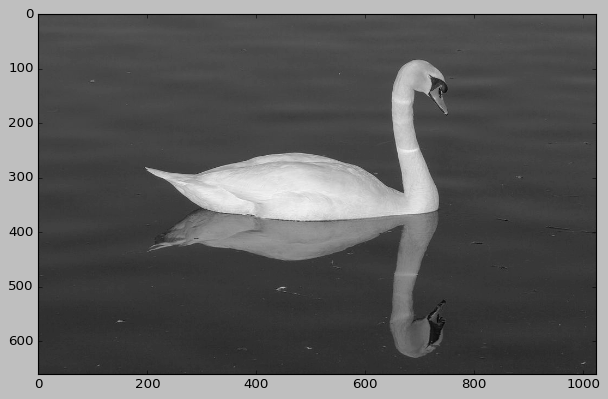

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F0551E270D0>


In [23]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [24]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [25]:
U.shape

(660, 660)

In [26]:
V.shape

(1024, 1024)

Valores minimos necesarios:  [[1 2 3]
 [4 5 6]
 [7 8 9]]


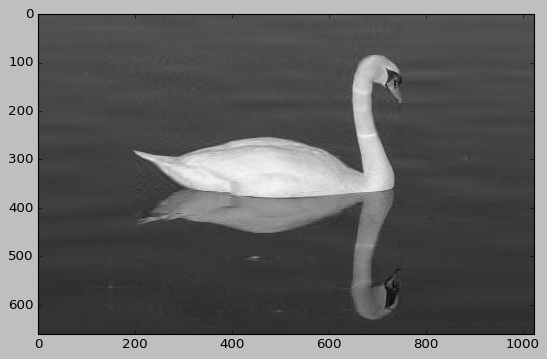

Felicidades la imagen está comprimida


In [27]:
#Cuantos valores crees que son necesarios?
#A=np.array(U.shape)*np.array(D.shape)*np.array(V.shape)
#A=np.dot(np.dot(U, D), V)
print("Valores minimos necesarios: ", A)
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 45
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[182. 182. 182. ... 200. 198. 197.]


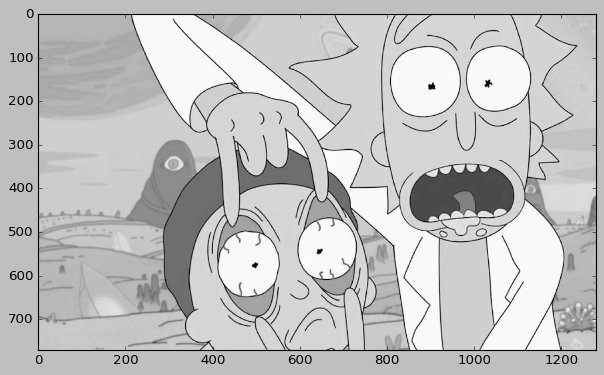

<PIL.Image.Image image mode=LA size=1280x770 at 0x7F05393AB5D0>


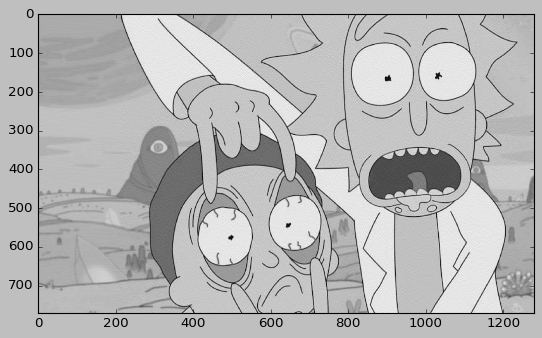

Felicidades la imagen está comprimida


In [28]:
#imagen 1
url="https://es.rollingstone.com/wp-content/uploads/2022/09/La-serie-Rick-y-Morty-podria-ser-eterna.jpg"
img = Image.open(urllib.request.urlopen(url)).convert('LA')

imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

# obteniendo valires de Singular Value Descomposition
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

nvalue = 210
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])


plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")


[254. 254. 254. ... 250. 250. 250.]


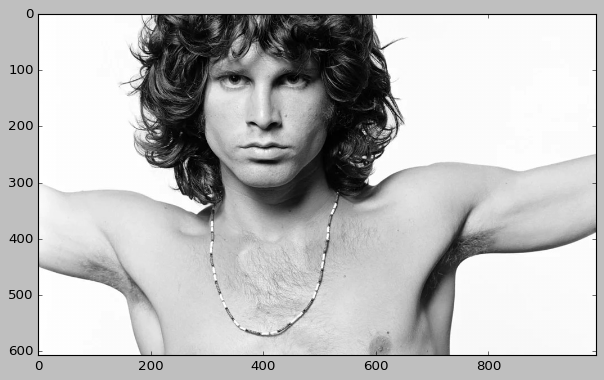

<PIL.Image.Image image mode=LA size=992x606 at 0x7F05392D0D90>


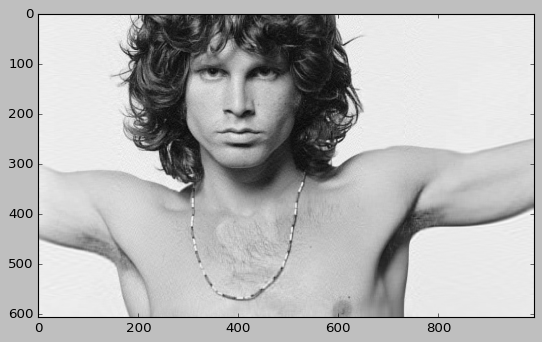

Felicidades la imagen está comprimida


In [29]:
#imagen 2

url="https://www.infobae.com/new-resizer/jcemnTXY6H7W0tnSoBbuFxbhpxo=/992x606/filters:format(webp):quality(85)/cloudfront-us-east-1.images.arcpublishing.com/infobae/6EE3LEPMGZHG3EO3WV3TIE2Q6E.jpg"
img = Image.open(urllib.request.urlopen(url)).convert('LA')

imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

# obteniendo valires de Singular Value Descomposition
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

nvalue = 110
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])


plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[25. 25. 25. ... 26. 26. 26.]


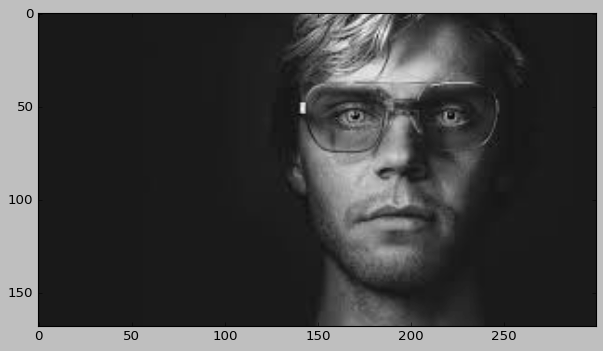

<PIL.Image.Image image mode=LA size=300x168 at 0x7F0539172A90>


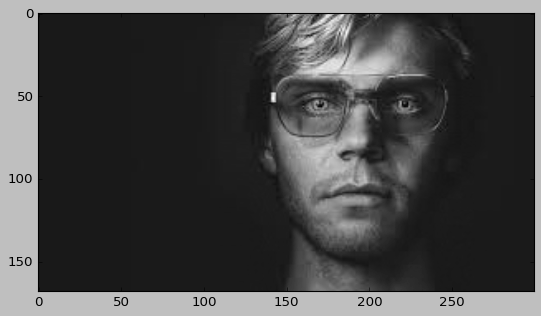

Felicidades la imagen está comprimida


In [30]:
#imagen 3
url="data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxASEBUQEBAVEBAVFxUQFRUQEBcVEBAVFRUWFxUVFRUYHSggGRolHRUVITEhJikrLi4uGB8zODMsNygtLisBCgoKDg0OGxAQGi0lHyUtLTArLS0tLS0tLy0tLS0tLS0vLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAKgBLAMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAAAQUCBAYDB//EAD8QAAIBAgMFBQYDBwEJAAAAAAABAgMRBCExBRJBUWETInGB8DKRobHB0QZC4RQjM1JicqLxBxUkQ5Ky0tPi/8QAGgEBAAMBAQEAAAAAAAAAAAAAAAEDBAIFBv/EACsRAQACAgECBAUEAwAAAAAAAAABAgMRIQQSEzFBUQUiMnHwYYGh8SOxwf/aAAwDAQACEQMRAD8A+RgAAAAAAAEkEgAAAABAEglALEkghImWez6m5ZxSc5ZL9en2K1m/gYzfs2VlZuWSVub5ZlWX6eXdPN1WFxG9btajzy3lKzfHdja7tc3sXXm9zD0ounB8UrXs1vPO+Sy7zvmrJLI1NkqjQjvZOo1nJ5TfRXXcjk3zdnfTP22fVnOTqR3rzTjHcinKMFbSPBN/9yR4l4jumYjiPfy39mv0em1cLVsqVCDlUk1GKz3rayqP+VWWTfO7zsWf4e2FDCLeVq+L0UF3oUm826kr5O7bza6XyPGPayvCFKtUV7TnUqdlQy9pylBuTtkrJcOjtYbJqbtpTUVGN92NOG7FvP2IO9+PelfnbRmfJkvFO3fHr+v57cHbE8tirhYUpdtV/wCJxOVrq9OF77sYR5Z6pZ55K7Oc/EMJ9nOc3eS/ezb/ADTm32a8FaTVtLLQs3tVVKzcmrRlGKUHeMXN96bl+acYRnJWyTjFGj+OsbGUadFWi53xFTd0ztGnFLpBRy6k4K2jJWJ/I/P5Q+fUKV5XUU3/AFZpdbae+6Nx4maUop5yteXGy5edvcuStvPB2jZK0evwuakqGZ7XiRZz4emgqF+BnLZ7toXOz8C20WWIwqUbW9zK79V2zqHUYNxy4irQtrkeDVi6x9GzK/d/VM20ybjbLampeEI3POSaNndUXmrxfHivdqYV6fHVPidxPLmYeSBijI6cgAAgAEiAAAAAAAAACQAAAEkEkAZIxMkBJKIMkcpelFZ6X+RY0cQorNq6zsrJR6q/Hrr4FSptZJ24szwyTef+pxem/NZW2l7h6u/nJrd6/m8uEfj8Dp9kbWpxbUaU6jaz7NbzaTySyStxtfnqcomklvZX4XyWeTduPQvdkQ3k47kJxv3t6bs/7t3PllY8vqaVmvLTV18tqVpxcey7Cn7L3oxlKatorOyXCyuc3tOq9zchvSbbTs73t+V9dMtcuGZbzwsklGCpxi7Z9pBReWivJu3RK/UjCbBU+7BKdrxc81Tim80nZXfhdvi+J5eO+PHzPl+ef9rYrw5ihJ3VKOXtu/8ANJxtJpauKu1fi0zd/ZJVsUpy0e/LwimopeWS8jt8H+GaVPNZyercV5JckuR4UcJFudZLuy/dwtxhBvvL+6Tk78Vuk26+szM0j01v7prWPdx+14Jd1LM1MPs+UuHwOqWxHKblLjwLWlsuMVoTPW1pXULJrG+XKUcG4W+fLUxxejvyv+h02Lw0UszmNpweiy1Jw5fEnaZ4hzmPjfPnfzKetGxc4vLLW/q5TYl5nu4PJgytSUyaNSztw49UecmIRubNRpn29cVh913Wjz8DwRs1K7cVF3y5u6/Q1mK71yiUgAlCAASIAAAAAAAAJIJAAAASQSQCMkYoyQEokhEkJYSNnCTSfhn4mmzawELy3dLp/Ai/0uq+a2wdGVaT3ISk10yS8dI/A6rYlGnSalUzktNySdut08/oUGIquEFSpZJcvzS4yfP6Kxp1IzX5s/l5nmZKTmjW9R/LZWe19Uw2PoTtvKUutSStp4m7PbkI5RheK0anTS9zaZ8ZniKkf+Zbpc8ZY+qvz3XiYp+Dxafq/wBubZfd9olttTW7uuMXk3vQzXFe19TZlioJLuysrJZRt/iz4rQ2nVa3XUef9TWmaOv2Jtapa0k3Szs5vONn8VpoZ8/wycccLMdot6u6eLhyk/BL6s8MTtNRXsT83T/87lLW21QjBNyaf9kvsc9tj8TQdN7j72SWVmm752fJL3tGfD0NsltdvH7rLTWsbmV7tDayno4xV7d6pTjnyW9JXfgVtXE0mr9vT3uP8TJNcN2DXxOArYxt3v8AYweKlzZ7dPhkVjUSzT1PLr8QqElZ4in5xrf+s5zaUIp9ySmucb29zs/gaPaN8SJU2bMWDw5+pVbJ3PNmMXZnrTg3kld2bVumb+Cb8jxkao9lUs6rXnx+5gQSiUJQCAQgAAQACQAAAAACSCQAAAAACUZIxRkiBKE9AhUeRCXkzq/9ne2KGFxNSpXm4RlRnTi1GUu+3Fq+6nyZyhv7LpqTaeeVvicZoiaTEprG503qGITS5pJHliVxlJpck839iaODdm1wbi/L9LPzPV4XS+T6oz7rE8NXzTHL22Q5Scexows2o71T2bvwzenOx64pSlKpCMqNVxXaNU01eKUW2nd29tKzto+RubLnUgnBwlJXT3o3cotO6lxzT9/G5vTpQTnajKMp96bUYQc9bqTis1dvxMt8urzx9ncUtMRG3KU8P3rONstLZ+K5+RcYGs6VJxe9KMt6EVF6dxPS2neRZVsNF3luWente555ryPfY0ITmt6KlnOV+Fpzuv8AFJefQ4y9RFq7mOE+DEcKHEbMlGKalOzTzcXuLz6+Bz1ejbN3TvZqUbNa9eh9X/EFZQpuyys/DQ+d7Ul2se0S70cqn9yvZvxXyZZ0PU2yRuY4V58VYjcKiFO7tZt8lqWjpKlSjUnGFpb6Sk25Ps3FS4r+dWSvx5Gnhaii1LPLPUvqO0qM4KNSkp2e8t6MZJN6uKel9bGzNe0a43CqlY9PNS7QpOMrOCjz3XePlfM8KU8rPyLLamKjK6VO8nJyc5u7bfRJL5lbTpvidUmZpyWjVuHrh0oyUnor38N13NCRvydoyfTdXjL/AOVI0JFlPdXZBKIJTLHCQAQIAAEAAkAAAAAAkgkAAAAAAlGSMTJECURMkEJebLLYb75XpfM38FDdW/wul71f6HGXmsw7x/Vt1lPCbv7zWElaf9NvZn9H5cjx2ng3ZOKyutC12JVW6rli9lUpJqG/Tetqcu75RldLyR4Fuo7L/M9Ht44U1CLij1nVfBXfP5m/PZuX8abfVU3pr+QhbPu7OrUl0Sgm/wDpjf4lfi1nmf8AqdSpsZXajbWTXn5fTrYtti4dwilbO2fj06Ho9i9+NlaK7zu222tHJvNl5hsPBOzdmV5+or2dtXURMcy5z8T502mz5zUlZtJvl4+J9W/EUKSpTbksr2Pk+Jacm0en8KtukwzdT6MaciwwTVjTpUW1dGzhnKLzSt4L5no5OYZ6biWzUS5Hm8O3yXVuyXVst6WGi1fx4/Y0NoLdXyv+pmpk3OoXWrxuVVjJR9iDvGN82rbzesrcFkrLklxuacj1mzxZvrGoZLDMkYko6cpABAgAEiAAAAAAAACSCUAAAAAASZIxRKIGRJAISmMbuxazwTjRU1dxaTfFJ3+HIqU2s1qsy5wWIUouLeTWZTmm0amFuLU7iVzsKvdR92R1mBn43Wv1+RwOw6+60mdlgq2SfgeJ1uPVpb8Nt1X9OhCXC/rkbLjCCyST8jQoVvXrwNxO8lJ5paWPGvE75XNLa2NlRpOpuudrtpLTk7cjj6e1cdVe/wBnCCeaV2528vsd5OO8s0Vv7FRpScoU4qWd91eduhq6fNSlZia7lzaJn1fO9v7TrXdOd+qayt1KSkm9UrH0DamzVOlKTWcs3z9fc4+Oz4RlaV2fQdLnpNNRGtMeWlu7e3nsx8F5FtToc0eNPCqLW6rL1Yu4YdOCkuWficZssb27x041Kvi91dPSsUm0K+8y12jO1znqsrl3T038yvLb0eEzGxL1MpM3MkvMySIRIQAACAASIAAAAAAAAJIJAAAAAAJJRiSQMgRcASLtZp2AIS39n1bJP3nX7Ir3sn6fE4nAy4anR7Iq2txXr7Hn9Zj3EtfT2drh6llr1PeW0IrJZ28ikxNe0LJ6vzt6aNLF7XhCydutjxY6abz5N0206SlVqTeto+Oa9P6EyhlJOa7SztG6u7nNVdt1ppU8NTlu2V3FW/ydkaNSli7/AMJX/qk28+eR3XpJ9ZiP0R3fu7JU49i9/u91rv2jZrh8Dicfgrpyi09Xk0+OR44zD4+S78XJLhv3SRXyq1oe1BrnZm3pummm5i8TtTe8esSzpYiS9rTx08y7wmOW5a+fqxzVPGXmlquvrxN3E07Z+aeeXqxry4otqJVUvMeRtSXUpKjNiviHJZmpJmrFTtjTPktuWDCBkkXqSwAIAAgAACRAAAAAAAABJBIAAAAAAAAAkgEDIkxRIHpQlZ9C4wVVXVuGVtfBlIbGGrvnZlWWndC3HbUu3w1TtIJXz9fcssPgacc7Jyzztm7nK7MxLWnx8NC7oYyT520/Q8TPitE6ieHo0vEwtJT3dFl8DRxm39z8jfhY2I9+K3c79CuxexKknqU4q49/5HdrW18qYfiK/wCS2XNcSjx+JlKTaja+rZYf7oqLivLU0cXScb36/A3Ya4ot8iq03mOVUoWldm9i5rcVsnaxqN8zWrVzd290wy92oa1RnkzKTMTVDNMpQACAAgCSAAAAJEAAAAAAAAEkEgAAAAAAAAAAAJIJIEmxSob0brU1iz2csjjJOo27pG50y2diLOzdmnc6HB4u9ufha65HPY3CW78cvqTgcXZW0fDL16Rky44yR3Q0UvNJ1Ls8Pjkn3WtLm1Lad43vqvWZyX7ctFppx8TGePX0vfLx9cjDPR7nyaPFh0WK2heN083bX4/IoMdiW73/ANVy8jWqY5t24LI0ate6z9eJpw9N2q8mbaZzRpVWZ1Jng2ehWumS1toYMkiJHbgIACAAEgAAAAAgAAAAAAAAkgkAAAAAAAAAAAAAIElvs1ZFTFZl1go5FOeflW4o5b8Emt3iV+KwKu0k/sWmHj9vkZV6Tdnlnfppz+xhrkmtuGuabhzlXD1IdUa0qkuKOt7FOOnuWTZpV9nK2a/Q0U6mJ84U2wz6Oe7UjfZu4rCW4GtKmaa2iY4UzWYeRKRLiZwidbc6QkYTRsWPGoiIlMw8gAdOAAEgAAAAAgAAAAAAAAkAAAAAAAAAAAAAAIHtho3ki5oIAzZ5aMK3wMLm5VoeaAPJyTMWbaxw8lQs8s161Fdu3DrYkCJ3JpT4ulfw9cSvr0ADfjtMKL1hrKlmenZWANE2lTFYYSR41IgHdXNmuAC1SAAkAAAAAH//2Q=="
img = Image.open(urllib.request.urlopen(url)).convert('LA')

imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

# obteniendo valires de Singular Value Descomposition
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

nvalue = 90
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])


plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




***Before PCA****


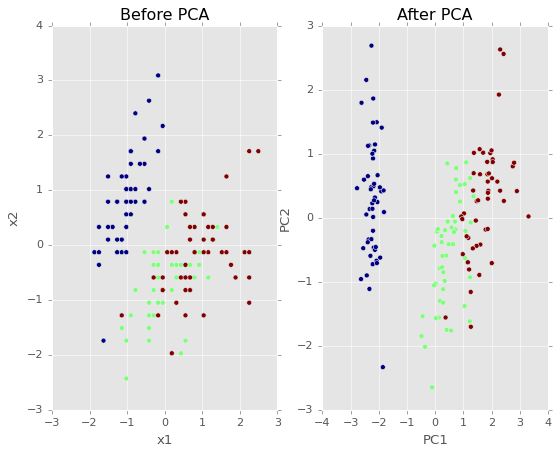

[0.72962445 0.22850762]
total of values:  0.9581320720000165
most important features: [[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [31]:
#tu codigo aqui
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

print("***Before PCA****")
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])
print("total of values: ", pca.explained_variance_ratio_.sum().astype(float))

# validating values with eigenvectors
np.cov(X_new.T)

# most important features:
print("most important features:", abs( pca.components_ ))


# BioPlot
Custom implementation for Python

In [32]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''    
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

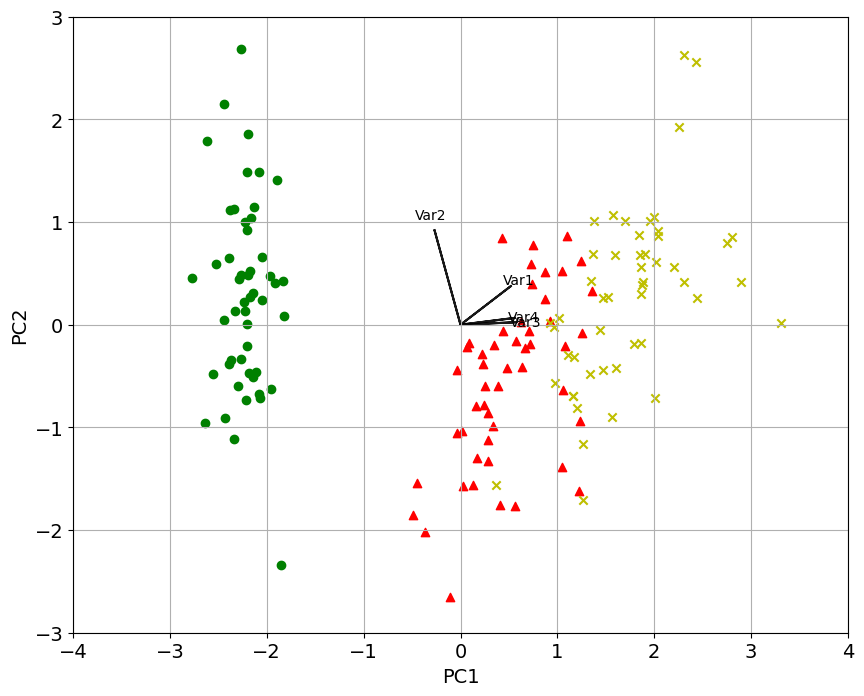

In [33]:

plt.rcParams.update(plt.rcParamsDefault) # reset ggplot style# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

## Validation

In [34]:
# Var 3 and Var 4 are extremely positively correlated
print("Var 3 and Var 4 correlation: ", np.corrcoef(X[:,2], X[:,3])[1,0])

# Var 2and Var 3 are negatively correlated
print("Var 2 and Var 3 correlation: ", np.corrcoef(X[:,1], X[:,2])[1,0])


Var 3 and Var 4 correlation:  0.9628654314027957
Var 2 and Var 3 correlation:  -0.42844010433054014


Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

## Conclusiones 

PCA es una tecnica que nos sirve tanto para simplificar datos complejos, como para eliminar ruido e identificar los datos mas relevantes mediante el uso de alebra linear. Como lo pudimos constantar claramente en el ejemplo clasico de Iris, donde mendiante el uso de PCA pudimos definir con claridad los distintos tipos de subespecies correlaccionadas. \n PCA adicionalmente nos permite maximizar la varianza y, como ya se meciono, resaltar las variables con mas caracteristicas o con mayor relevancia para el modelo.